In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from scipy.stats import pearsonr
import scikitplot as skplt
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import dalmatian
import sklearn.metrics as metrics

In [81]:
working_dir = "../../data/working/"

data = pd.read_csv(working_dir + "combined_data.csv", index_col=0)
data.head(5)

,participant,document,fixation_x mean,fixation_x std,fixation_x amax,fixation_x amin,fixation_y mean,fixation_y std,fixation_y amax,fixation_y amin,...,amax_pupil,amin_pupil,pId,Engagement,Valence,Arousal,docId,docNames,Class,Category
0,P01,D00,661.593377,206.492544,1453.693294,316.373080,320.276397,75.319955,739.800049,80.357540,...,3.385757,1.664062,1,4.0,3,4,0,Cost of War,1,Happy
1,P01,D01,635.410818,207.265634,1013.003912,338.981827,300.432364,55.105215,465.439008,55.917046,...,3.122543,1.867905,1,3.0,2,1,1,Stock Market,3,Sad
2,P01,D02,635.486407,213.107915,1038.041214,321.271459,297.498786,49.033431,471.024023,136.934902,...,2.903786,1.916336,1,5.0,3,4,2,Electic Car Revolution,1,Happy
3,P01,D03,643.022324,210.513589,1270.360341,247.930539,319.114606,86.679633,774.132298,108.102508,...,3.209412,1.834923,1,4.0,5,4,3,English Ghost Story,1,Happy
4,P01,D04,635.465835,206.659870,1133.699770,329.024283,280.642221,59.753810,435.185559,106.929884,...,2.959793,1.810211,1,5.0,2,3,4,The Big Bang explained by Artifical Intelligence.,2,Angry


In [82]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
#data.fillna(data.mean())
data.fillna(0, inplace=True)

In [93]:
data.columns

Index(['participant', 'document', 'fixation_x mean', 'fixation_x std',
       'fixation_x amax', 'fixation_x amin', 'fixation_y mean',
       'fixation_y std', 'fixation_y amax', 'fixation_y amin',
       'fixation_duration mean', 'fixation_duration std',
       'fixation_duration amax', 'fixation_duration amin',
       'saccade_length mean', 'saccade_length std', 'saccade_length amax',
       'saccade_length amin', 'saccade_angle mean', 'saccade_angle std',
       'saccade_angle amax', 'saccade_angle amin', 'saccade_velocity mean',
       'saccade_velocity std', 'saccade_velocity amax',
       'saccade_velocity amin', 'num_fixations', 'num_saccades', 'mean_pupil',
       'std_pupil', 'amax_pupil', 'amin_pupil', 'pId', 'Engagement', 'Valence',
       'Arousal', 'docId', 'docNames', 'Class', 'Category'],
      dtype='object')

In [84]:
def plot_cmx(labels, predicteds, binary=False):
    cmx = confusion_matrix(labels, predicteds)
    cmx = cmx.astype('float') / cmx.sum(axis=1)[:, np.newaxis]
    if binary:
        class_names = ['non_stress', 'stress']
    else:
        class_names = [1,2,3,4,5]
    plt.figure(figsize=(8, 6))
    plt.title("mean accuracy: %.2f" % accuracy_score(labels, predicteds))
    sns.heatmap(cmx, annot=True, fmt=".0%",center=1, xticklabels=class_names, yticklabels=class_names)

    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()
    
def plot_roc_curve(y_true,y_pred):
    

    skplt.metrics.plot_roc(y_true, y_pred)
    plt.figure(figsize=(10,10))
    plt.show()

Accuracy with Subject 1 as test : 0.35714285714285715
Accuracy with Subject 2 as test : 0.14285714285714285
Accuracy with Subject 3 as test : 0.42857142857142855
Accuracy with Subject 4 as test : 0.07142857142857142
Accuracy with Subject 5 as test : 0.42857142857142855
Accuracy with Subject 6 as test : 0.42857142857142855
Accuracy with Subject 7 as test : 0.2857142857142857
Accuracy with Subject 8 as test : 0.35714285714285715
Accuracy with Subject 9 as test : 0.07142857142857142
Accuracy with Subject 10 as test : 0.2857142857142857
Accuracy with Subject 11 as test : 0.5
Accuracy with Subject 12 as test : 0.5
Accuracy with Subject 13 as test : 0.35714285714285715
Accuracy with Subject 15 as test : 0.2857142857142857
Accuracy with Subject 16 as test : 0.2857142857142857
Accuracy with Subject 18 as test : 0.35714285714285715
Accuracy with Subject 19 as test : 0.21428571428571427


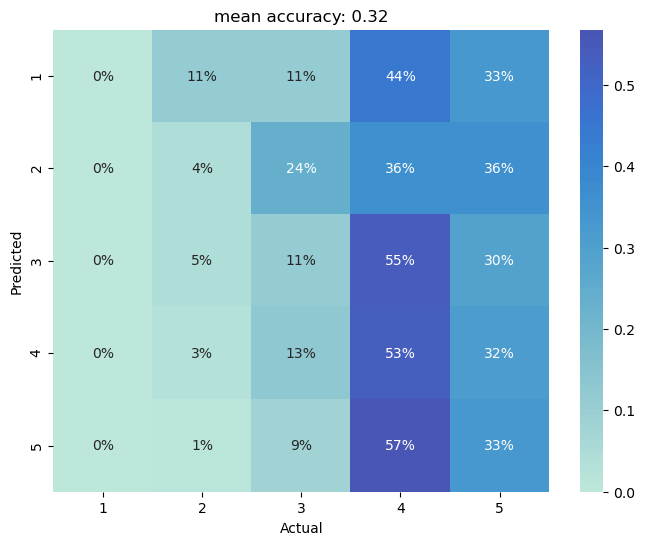

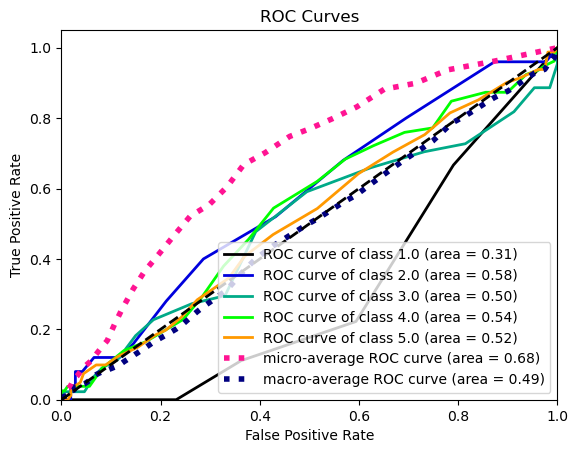

<Figure size 1000x1000 with 0 Axes>

              precision    recall  f1-score   support

         1.0     0.0000    0.0000    0.0000         9
         2.0     0.1429    0.0400    0.0625        25
         3.0     0.1724    0.1136    0.1370        44
         4.0     0.3360    0.5316    0.4118        79
         5.0     0.3506    0.3333    0.3418        81

    accuracy                         0.3151       238
   macro avg     0.2004    0.2037    0.1906       238
weighted avg     0.2777    0.3151    0.2849       238



/Users/jai/opt/anaconda3/envs/dl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jai/opt/anaconda3/envs/dl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jai/opt/anaconda3/envs/dl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
features = data.iloc[:, 10:32].columns
engagement = data['Engagement']
emotion = data['Class']
participants = data['pId'].unique()

pred = []
label = []
acc = []
y_probas = []
proba = []

for part in participants:
    
    df_train = data[data['pId'] != part]
    X_train = df_train[features]
    y_train = df_train['Engagement']
    #print (X_train)

    df_test = data[data['pId'] == part]
    X_test = df_test[features]
    y_test = df_test['Engagement']

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    clf = RandomForestClassifier(n_estimators=50, random_state=0)
    #clf = SVC()
    clf.fit(X_train,y_train)

    acc = clf.score(X_test,y_test)
    print('Accuracy with Subject ' + str(part) + ' as test : ' + str(acc))
    y_probas.extend(clf.predict_proba(X_test))
    proba.append(clf.predict_proba(X_test))

    pred.extend(clf.predict(X_test))
    label.extend(y_test) 

plot_cmx(label,pred,binary=False)
    
plot_roc_curve(label,y_probas)
print(classification_report(label, pred,digits=4))

Accuracy with Subject 1 as test : 0.21428571428571427
Accuracy with Subject 2 as test : 0.14285714285714285
Accuracy with Subject 3 as test : 0.2857142857142857
Accuracy with Subject 4 as test : 0.14285714285714285
Accuracy with Subject 5 as test : 0.2857142857142857
Accuracy with Subject 6 as test : 0.21428571428571427
Accuracy with Subject 7 as test : 0.0
Accuracy with Subject 8 as test : 0.21428571428571427
Accuracy with Subject 9 as test : 0.07142857142857142
Accuracy with Subject 10 as test : 0.2857142857142857
Accuracy with Subject 11 as test : 0.35714285714285715
Accuracy with Subject 12 as test : 0.2857142857142857
Accuracy with Subject 13 as test : 0.2857142857142857
Accuracy with Subject 15 as test : 0.14285714285714285
Accuracy with Subject 16 as test : 0.35714285714285715
Accuracy with Subject 18 as test : 0.2857142857142857
Accuracy with Subject 19 as test : 0.2857142857142857


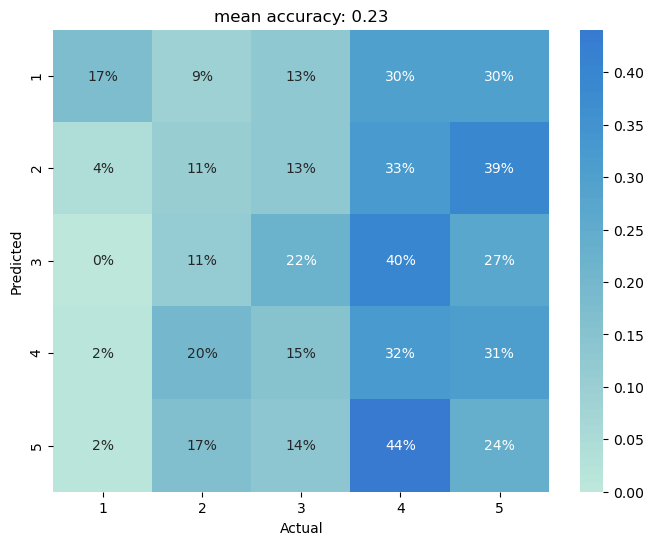

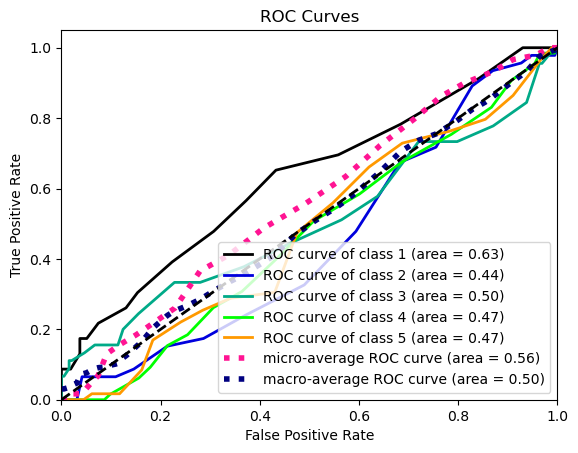

<Figure size 1000x1000 with 0 Axes>

              precision    recall  f1-score   support

           1     0.5000    0.1739    0.2581        23
           2     0.1429    0.1087    0.1235        46
           3     0.2703    0.2222    0.2439        45
           4     0.2414    0.3231    0.2763        65
           5     0.1972    0.2373    0.2154        59

    accuracy                         0.2269       238
   macro avg     0.2703    0.2130    0.2234       238
weighted avg     0.2418    0.2269    0.2238       238



In [91]:
pred = []
label = []
acc = []
y_probas = []
proba = []

for part in participants:
    
    df_train = data[data['pId'] != part]
    X_train = df_train[features]
    y_train = df_train['Arousal']
    #print (X_train)

    df_test = data[data['pId'] == part]
    X_test = df_test[features]
    y_test = df_test['Arousal']

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
    #clf = SVC()
    clf.fit(X_train,y_train)

    acc = clf.score(X_test,y_test)
    print('Accuracy with Subject ' + str(part) + ' as test : ' + str(acc))
    y_probas.extend(clf.predict_proba(X_test))
    proba.append(clf.predict_proba(X_test))

    pred.extend(clf.predict(X_test))
    label.extend(y_test)

plot_cmx(label,pred,binary=False)
    
plot_roc_curve(label,y_probas)
print(classification_report(label, pred,digits=4))

Accuracy with Subject 1 as test : 0.2857142857142857
Accuracy with Subject 2 as test : 0.42857142857142855
Accuracy with Subject 3 as test : 0.2857142857142857
Accuracy with Subject 4 as test : 0.35714285714285715
Accuracy with Subject 5 as test : 0.2857142857142857
Accuracy with Subject 6 as test : 0.2857142857142857
Accuracy with Subject 7 as test : 0.07142857142857142
Accuracy with Subject 8 as test : 0.5714285714285714
Accuracy with Subject 9 as test : 0.2857142857142857
Accuracy with Subject 10 as test : 0.14285714285714285
Accuracy with Subject 11 as test : 0.2857142857142857
Accuracy with Subject 12 as test : 0.5
Accuracy with Subject 13 as test : 0.2857142857142857
Accuracy with Subject 15 as test : 0.07142857142857142
Accuracy with Subject 16 as test : 0.07142857142857142
Accuracy with Subject 18 as test : 0.14285714285714285
Accuracy with Subject 19 as test : 0.07142857142857142


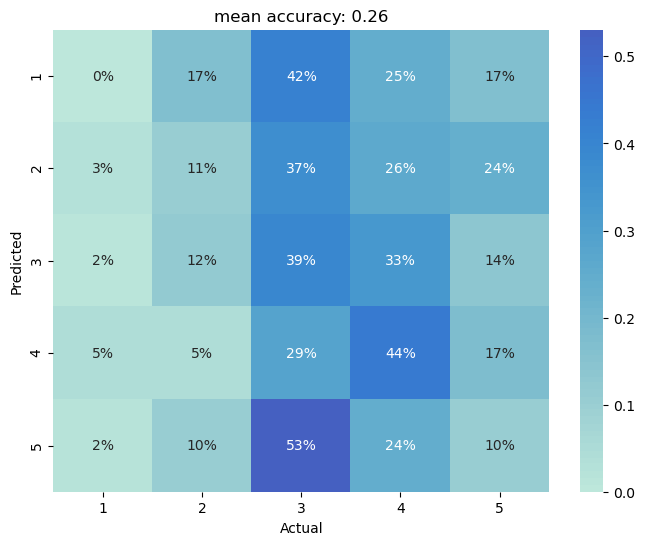

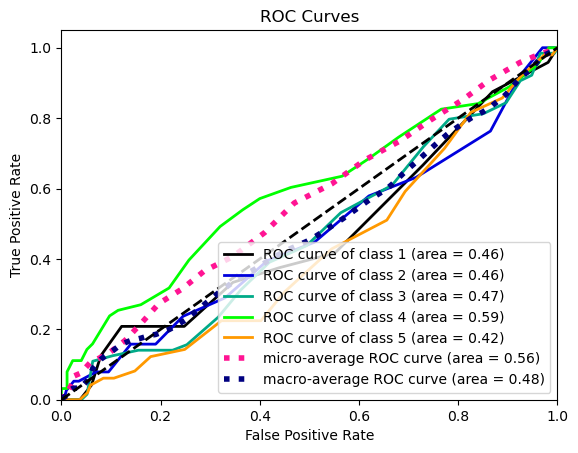

<Figure size 1000x1000 with 0 Axes>

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        24
           2     0.1667    0.1053    0.1290        38
           3     0.2688    0.3906    0.3185        64
           4     0.3636    0.4444    0.4000        63
           5     0.1316    0.1020    0.1149        49

    accuracy                         0.2605       238
   macro avg     0.1861    0.2085    0.1925       238
weighted avg     0.2222    0.2605    0.2358       238



In [92]:
pred = []
label = []
acc = []
y_probas = []
proba = []

for part in participants:
    
    df_train = data[data['pId'] != part]
    X_train = df_train[features]
    y_train = df_train['Valence']
    #print (X_train)

    df_test = data[data['pId'] == part]
    X_test = df_test[features]
    y_test = df_test['Valence']

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
    #clf = SVC()
    clf.fit(X_train,y_train)

    acc = clf.score(X_test,y_test)
    print('Accuracy with Subject ' + str(part) + ' as test : ' + str(acc))
    y_probas.extend(clf.predict_proba(X_test))
    proba.append(clf.predict_proba(X_test))

    pred.extend(clf.predict(X_test))
    label.extend(y_test)

plot_cmx(label,pred,binary=False)
    
plot_roc_curve(label,y_probas)
print(classification_report(label, pred,digits=4))